# Task: Predicting Employee Attrition using Machine Learning

<b>Objectives:<b>


1) To determine which factors contribute to employee attrition.
2) To determine if an employee will quit the organisation.




<b>Benefits of predicting employee attrition<b>
    

<b>Financial Impact:<b>
    

Reduced Recruitment Costs: By identifying potential leavers, companies can proactively plan for replacements, reducing the costs associated with recruitment and onboarding.
    
Increased Productivity: High turnover disrupts team dynamics and workflow. Predicting attrition helps maintain a stable workforce, ensuring project continuity and productivity.
    
Preserved Intellectual Property: Losing key employees can result in the loss of valuable knowledge and expertise. Early identification of potential departures allows for knowledge transfer strategies.

<b>Strategic Impact:<b>
    

Improved Workforce Planning: Understanding attrition patterns helps organizations optimize workforce planning and talent management strategies.
    
Enhanced Employee Retention: By identifying factors contributing to attrition, companies can implement targeted retention initiatives to boost employee satisfaction and loyalty.
    
Revealing Organizational Issues: High attrition rates might indicate underlying problems within the organization, such as poor management, inadequate compensation, or lack of career growth opportunities.
    
<b>Employee Morale and Engagement:<b>

    
Reduced Stress: Knowing that the company is proactive in addressing potential departures can boost employee morale and create a sense of security.
    
Improved Employee Experience: Targeted retention efforts based on attrition predictions can enhance the overall employee experience and foster a positive work environment.

# IMPORT MODULES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.svm import SVC, LinearSVC
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.tree import DecisionTreeClassifier

# DATA EXPLORATION AND VISUALISATION

In [2]:
# Loading the dataset
my_data = pd.read_csv("Employee_Attrition.csv")

In [6]:
# Setting display to max to view all rows and columns
pd.set_option("display.max.rows", None)
pd.set_option("display.max.columns", None)

In [3]:
# Inspecting the dataset by looking at the first 5 rows
my_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
# Checking the shape of the dataframe
my_data.shape

(1470, 35)

In [4]:
# Inspecting the dataset by looking at the last 5 rows
my_data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [8]:
# Getting basic info like datatype of the dataset
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
# Checking for null values if there are any
my_data.isnull().values.any()

False

In [10]:
my_data['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [11]:
my_data['JobLevel'].value_counts()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

In [12]:
my_data.columns.to_series().groupby(my_data.dtypes).groups

{int64: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], object: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']}

In [13]:
# Checking basic descriptive statistics 
my_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [14]:
my_data.loc[my_data["Attrition"] == "Yes"]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,3,Male,50,2,1,Laboratory Technician,3,Single,2028,12947,5,Y,Yes,14,3,2,80,0,6,4,3,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,3,Male,82,2,1,Sales Representative,1,Single,3407,6986,7,Y,No,23,4,2,80,0,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,1,31,2,Male,83,3,1,Research Scientist,1,Single,2960,17102,2,Y,No,11,3,3,80,0,8,2,3,4,2,1,3
26,32,Yes,Travel_Frequently,1125,Research & Development,16,1,Life Sciences,1,33,2,Female,72,1,1,Research Scientist,1,Single,3919,4681,1,Y,Yes,22,4,2,80,0,10,5,3,10,2,6,7
33,39,Yes,Travel_Rarely,895,Sales,5,3,Technical Degree,1,42,4,Male,56,3,2,Sales Representative,4,Married,2086,3335,3,Y,No,14,3,3,80,1,19,6,4,1,0,0,0
34,24,Yes,Travel_Rarely,813,Research & Development,1,3,Medical,1,45,2,Male,61,3,1,Research Scientist,4,Married,2293,3020,2,Y,Yes,16,3,1,80,1,6,2,2,2,0,2,0
36,50,Yes,Travel_Rarely,869,Sales,3,2,Marketing,1,47,1,Male,86,2,1,Sales Representative,3,Married,2683,3810,1,Y,Yes,14,3,3,80,0,3,2,3,3,2,0,2
42,26,Yes,Travel_Rarely,1357,Research & Development,25,3,Life Sciences,1,55,1,Male,48,1,1,Laboratory Technician,3,Single,2293,10558,1,Y,No,12,3,3,80,0,1,2,2,1,0,0,1


In [15]:
my_data.loc[my_data["Attrition"] == "No"]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7
10,35,No,Travel_Rarely,809,Research & Development,16,3,Medical,1,14,1,Male,84,4,1,Laboratory Technician,2,Married,2426,16479,0,Y,No,13,3,3,80,1,6,5,3,5,4,0,3
11,29,No,Travel_Rarely,153,Research & Development,15,2,Life Sciences,1,15,4,Female,49,2,2,Laboratory Technician,3,Single,4193,12682,0,Y,Yes,12,3,4,80,0,10,3,3,9,5,0,8


In [16]:
# Showing the distribution of the target variable. It is observed that the target variable is not uniformly 
# distributed. So there exist what is know as class imbalance. Varoius techniques exists such as over sampling
# and under sampling to correct class imbalance
my_data["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

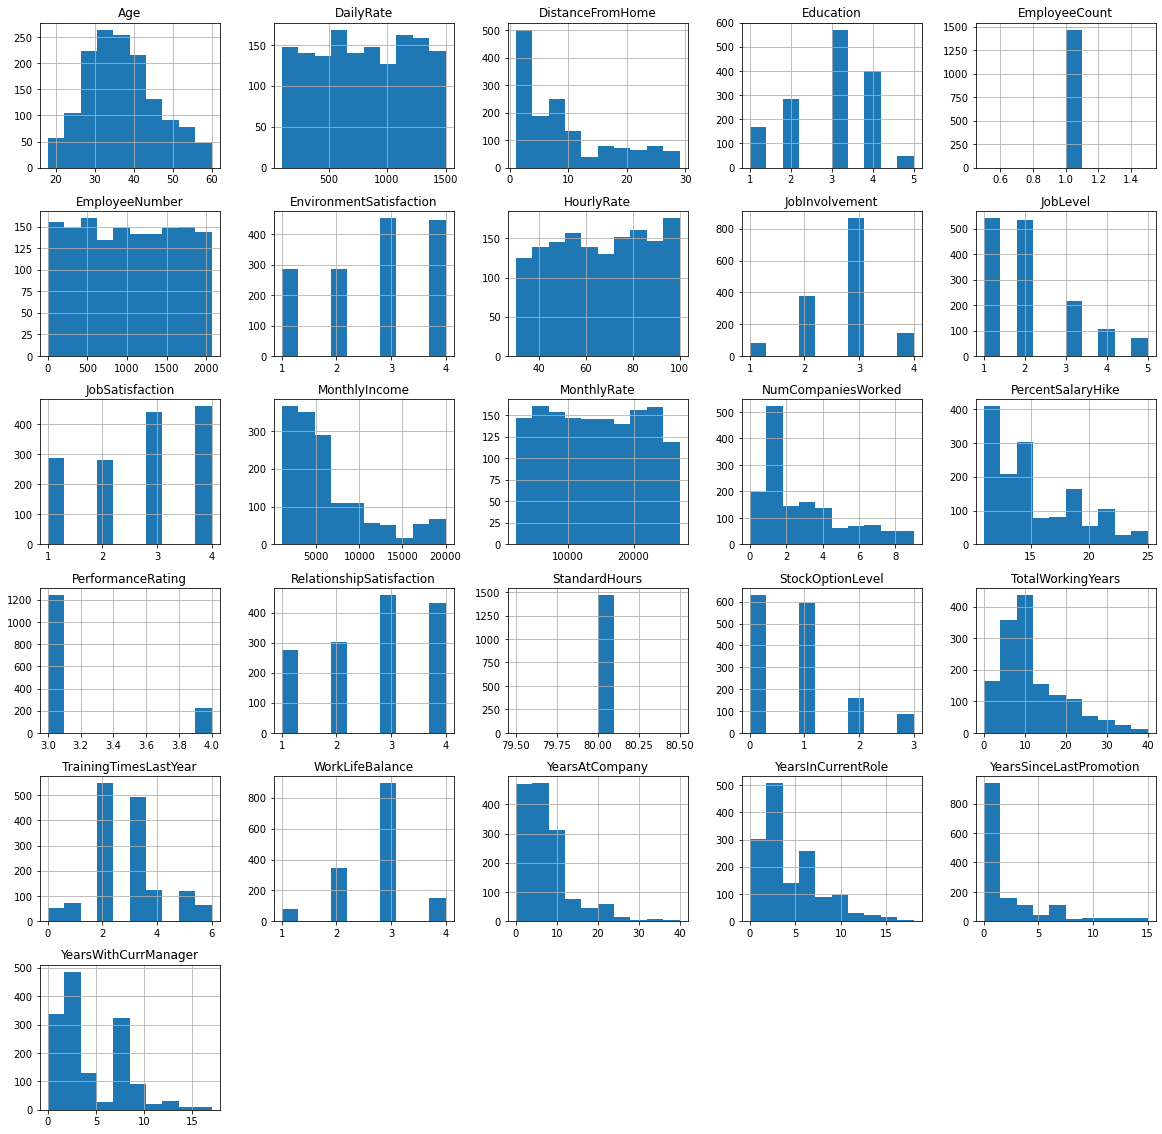

In [17]:
# Visualizing the numeric variables to assess their distribution
my_data.hist(figsize=(20,20))
plt.show()

In [18]:
# Extracting the categorical variables so as to visualize it
my_data_categorical = my_data[['Attrition', 'BusinessTravel', 'Department', 'EducationField','Gender',
                               'JobRole','MaritalStatus', 'Over18', 'OverTime']]


/Users/ny/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


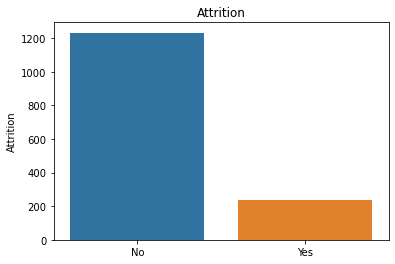

/Users/ny/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


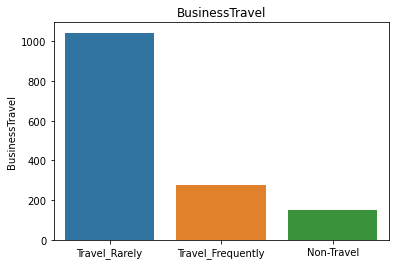

/Users/ny/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


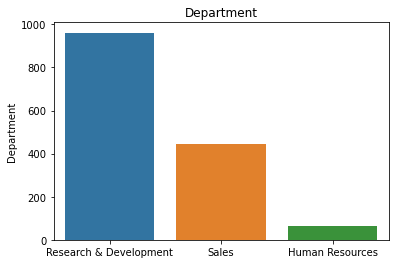

/Users/ny/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


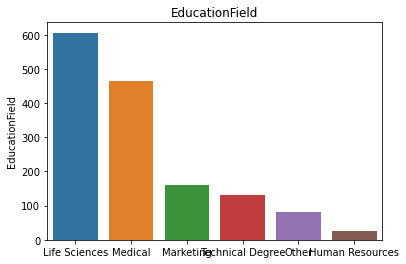

/Users/ny/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


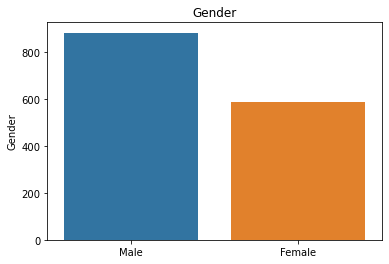

/Users/ny/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


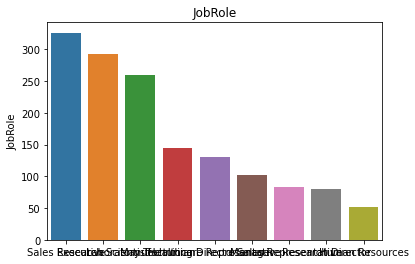

/Users/ny/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


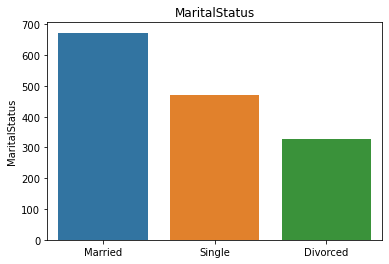

/Users/ny/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


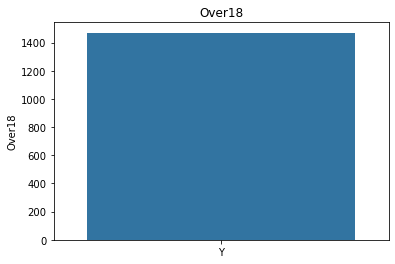

/Users/ny/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


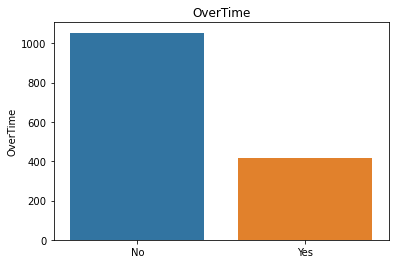

In [19]:
# Visaulizing categorical variables
for i in my_data_categorical:
    sns.barplot(my_data_categorical[i].value_counts().index,
    my_data_categorical[i].value_counts()).set_title(i)
    plt.show()

In [20]:
## Mean age and standard deviation of former and current employees
(mean, std) = norm.fit(my_data.loc[my_data['Attrition'] == 'Yes', 'Age'])
print(
    'Former Employess: average age = {:.1f} years old and standard deviation = {:.1f}'.format( mean, std))
(mean, std) = norm.fit(my_data.loc[my_data['Attrition'] == 'No', 'Age'])
print('Current Exmployees: average age = {:.1f} years old and standard deviation = {:.1f}'.format(
    mean, std))

Former Employess: average age = 33.6 years old and standard deviation = 9.7
Current Exmployees: average age = 37.6 years old and standard deviation = 8.9


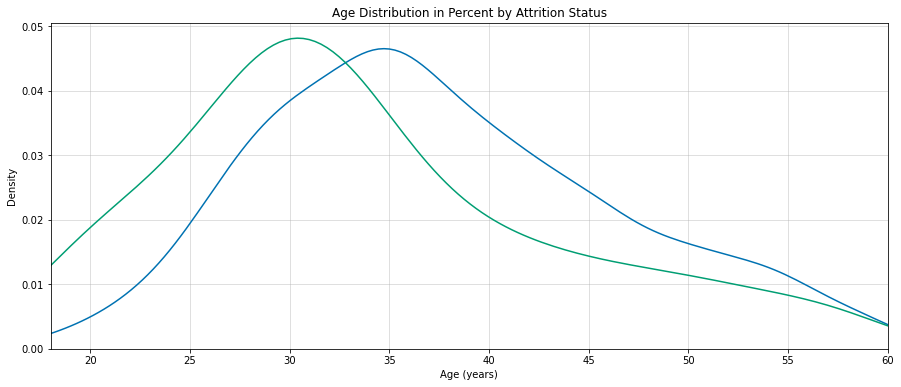

In [21]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(my_data.loc[my_data['Attrition'] == 'No', 'Age'], label = 'Active Employee')
sns.kdeplot(my_data.loc[my_data['Attrition'] == 'Yes', 'Age'], label = 'Ex-Employees')
plt.xlim(left=18, right=60)
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Age Distribution in Percent by Attrition Status');

In [22]:
my_data["Gender"].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [23]:
my_data["MaritalStatus"].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

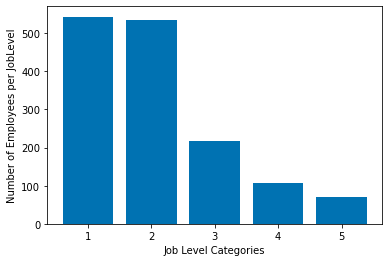

In [24]:
Job_Level = my_data.groupby('JobLevel').count()
plt.bar(Job_Level.index.values, Job_Level['JobRole'])
plt.xlabel('Job Level Categories')
plt.ylabel('Number of Employees per JobLevel')
plt.show()

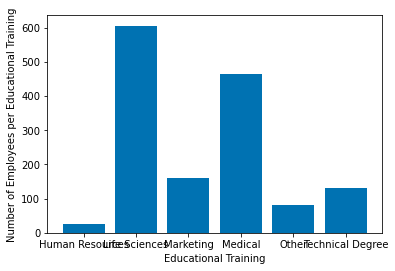

In [25]:
Education_Level = my_data.groupby('EducationField').count()
plt.bar(Education_Level.index.values, Education_Level['JobRole'])
plt.xlabel('Educational Training')
plt.ylabel('Number of Employees per Educational Training')
plt.show()

In [26]:
my_data["EducationField"].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

# DATA PREPROCESSING

In [3]:
## Dropping Attrition column which is the response and other unimportant variables creating a new data frame object so i can test for correlation
my_new_data = my_data.drop(["Attrition","StandardHours","EmployeeCount","EmployeeNumber","Over18",], axis=1)

In [4]:
my_new_data.shape

(1470, 30)

                               Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014   0.094961   
MonthlyRate               0.028051  -0.032182          0.027473  -0.026084   
NumCompaniesWorked        0.299635   0.038153         -0.029251 

<AxesSubplot:>

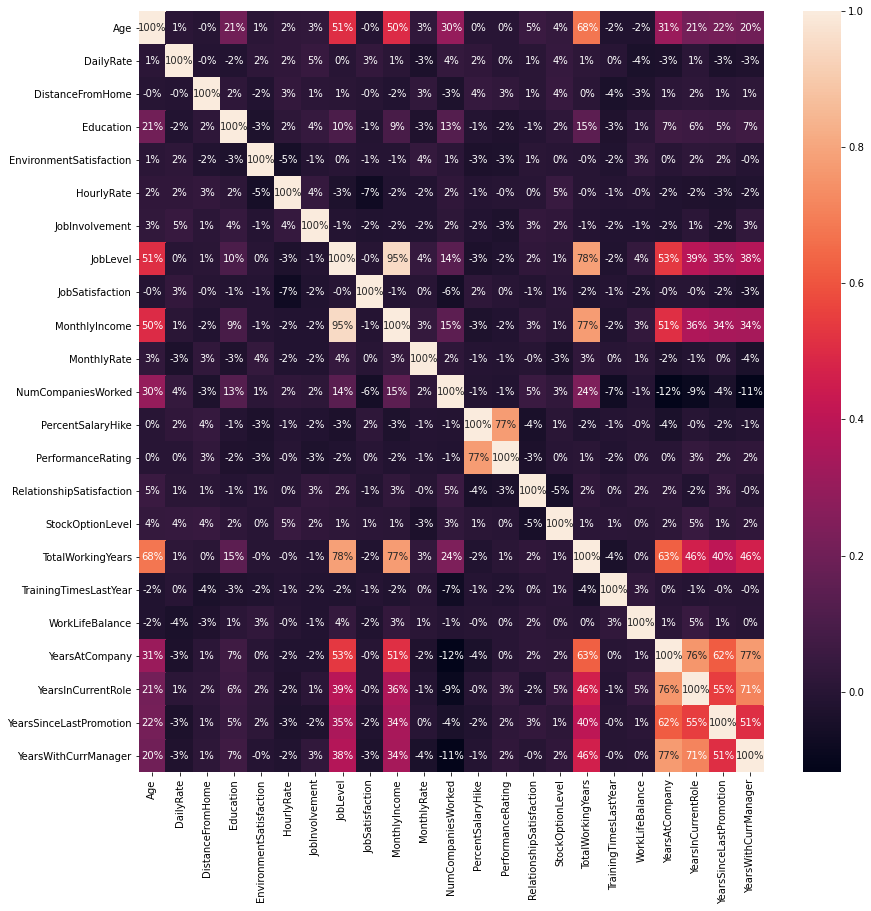

In [29]:
## Showing correlation and checking for collinearity
print(my_new_data.corr())
plt.figure(figsize=(14,14))
sns.heatmap(my_new_data.corr(), annot=True, fmt='.0%')

In [5]:
# One-Hot encoding categorical variables using pd.get_dummies and dropping the original variable using drop_first function
my_new_data = pd.get_dummies(my_new_data,columns = ['BusinessTravel', 'Department', 'EducationField','Gender', 'JobRole', 
                                                    'MaritalStatus', 'OverTime'], drop_first = True)

In [6]:
my_new_data.shape

(1470, 44)

In [7]:
# Exploring the modified dataset
my_new_data.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,2090,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,40,3,1,2,3468,...,1,0,0,0,0,0,0,1,0,0


STANDARDIZATION

In [8]:
# Scaling the data set to normalise it
data_scaled = pd.DataFrame(preprocessing.scale(my_new_data),columns = my_new_data.columns)

In [9]:
data_scaled.shape

(1470, 44)

In [10]:
data_scaled.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.446350,0.742527,-1.010909,-0.891688,-0.660531,1.383138,0.379672,-0.057788,1.153254,-0.108350,...,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,-0.918921,1.458650,1.591746
1,1.322365,-1.297775,-0.147150,-1.868426,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,-0.291719,...,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,1.088232,-0.685565,-0.628241
2,0.008343,1.414363,-0.887515,-0.891688,1.169781,1.284725,-1.026167,-0.961486,0.246200,-0.937654,...,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.918921,1.458650,1.591746
3,-0.429664,1.461466,-0.764121,1.061787,1.169781,-0.486709,0.379672,-0.961486,0.246200,-0.763634,...,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,1.088232,-0.685565,1.591746
4,-1.086676,-0.524295,-0.887515,-1.868426,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,-0.644858,...,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,1.088232,-0.685565,-0.628241


In [11]:
#Convert ‘Attrition’ feature into numeric
Attrition = {"No": 0, "Yes": 1}
data = [my_data]

for dataset in data:
    dataset['Attrition'] = dataset['Attrition'].map(Attrition)

# MODEL BUILDING

CREATING A DATA FRAME FOR THE RESPONSE VARIABLE "ATTRITION" CALLED TARGET

In [12]:
target = my_data['Attrition'].copy()
type(target)

pandas.core.series.Series

DATA SET SPLITTING

In [13]:
# Splitting the data set into train and test by 80/20
X_train, X_test, y_train, y_test = train_test_split(data_scaled, target, test_size=0.2, random_state=42) 

In [14]:
X_train.shape

(1176, 44)

In [15]:
X_test.shape

(294, 44)

In [41]:
y_train.shape

(1176,)

In [42]:
y_test.shape

(294,)

SUPPORT VECTOR CLASSIFIER

In [43]:
# Support Vector Machine Classifer Model
svc = SVC(kernel = "linear", random_state = 42)
svc.fit(X_train,y_train)
accuracy = round(svc.score(X_train,y_train)*100,2)
print("The accuracy for the training data set is:",round(svc.score(X_train,y_train)*100,2), "percent")

The accuracy for the training data set is: 89.37 percent


SUPPORT VECTOR MACHINE CLASSIFIER MODEL OPTIMIZATION 

In [44]:
## Selecting the optimal parameters for the Support Vector Machines Classifier Model
param_grid = [
    {"C":[0.5,1,10,100],
    "gamma":["scale",1,0.1,0.01,0.001,0.0001],
    "kernel":["rbf"],}
]

optimal_svc = GridSearchCV(
SVC(),
param_grid,
cv = 5,
scoring = "accuracy"
)

optimal_svc.fit(X_train, y_train)
print(optimal_svc.best_params_)

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}


In [45]:
## Fitting the Support Vector Machines Classifier Model with the optimal parameters
svc_optimal = SVC(kernel = "linear",C= 100, gamma = 0.0001, random_state = 42)
svc_optimal.fit(X_train,y_train)
accuracy_optimal = round(svc_optimal.score(X_train,y_train)*100,2)
print("The accuracy for the optimal model is:",round(svc_optimal.score(X_train,y_train)*100,2), "percent")

The accuracy for the optimal model is: 89.54 percent


In [46]:
# Support Vector Classifier Model prediction on test data set
svc_pred = svc_optimal.predict(X_test)
svc_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [47]:
# Confusion Matrix for Support Vector Classifier Model
svc_con_mat = confusion_matrix(y_test, svc_optimal.predict(X_test))
svc_con_mat

array([[245,  10],
       [ 23,  16]])

In [48]:
# Classification report on the accuracy score for Support Vector Machine Classifer Model
print(classification_report(y_test, svc_optimal.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       255
           1       0.62      0.41      0.49        39

    accuracy                           0.89       294
   macro avg       0.76      0.69      0.71       294
weighted avg       0.87      0.89      0.88       294



In [49]:
## Getting the coefficients from Support Vector Machine Classifier
svc_optimal.coef_trans = np.array(svc_optimal.coef_)

In [50]:
## Converting the coefficients to one dimension
svc_optimal_one_dim = svc_optimal.coef_trans.ravel()
svc_optimal_one_dim

array([-0.19012012, -0.0324738 ,  0.20231689,  0.06319242, -0.2977863 ,
        0.01115121, -0.25332891, -0.20131716, -0.33301261,  0.19190405,
        0.06817008,  0.33834031,  0.03359812, -0.02543885, -0.09807379,
       -0.15844231, -0.37859749, -0.13393399, -0.15251265,  0.41697945,
       -0.43311275,  0.34471775, -0.34398854,  0.40863908,  0.20432113,
       -0.05540466,  0.0009573 , -0.139707  , -0.06373701, -0.2029446 ,
       -0.15093603,  0.00554486,  0.08804512,  0.14031855,  0.39696089,
        0.09736572,  0.00648443, -0.21214756,  0.14452789,  0.300013  ,
        0.27640822, -0.01075902,  0.24934205,  0.64270077])

In [51]:
## Extracting the feature names
columns = X_train.columns
columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scienti

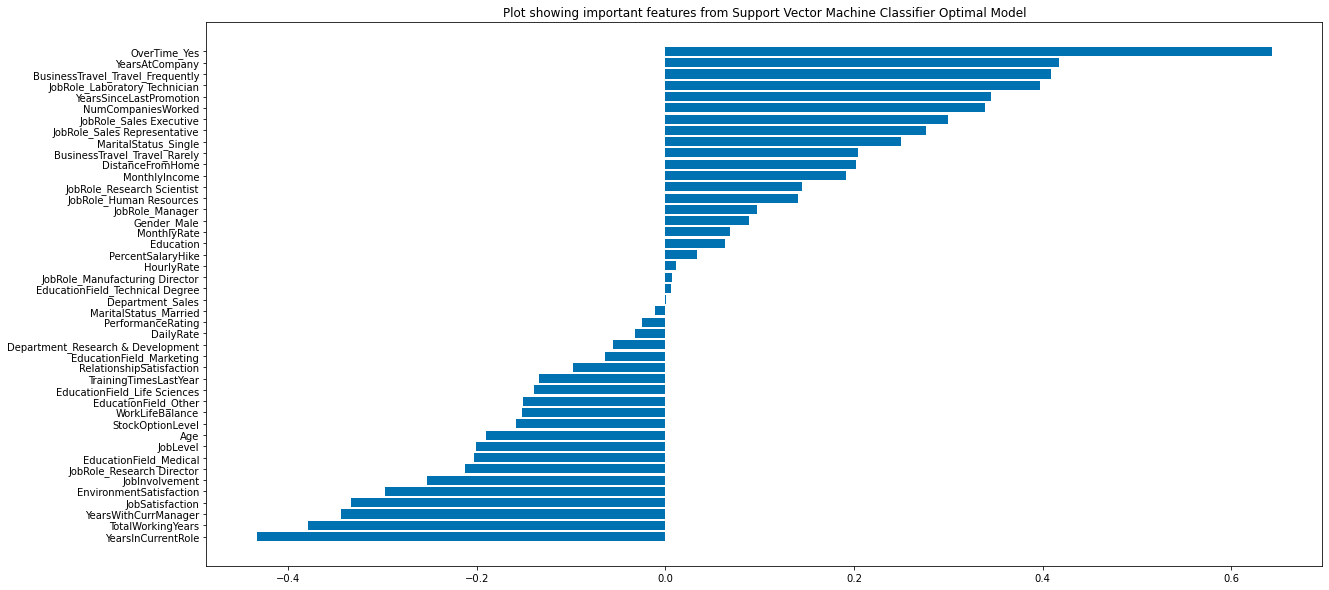

In [53]:
## Plotting the features using the below function
def f_importances(coef, columns):
    imp = coef
    imp,columns = zip(*sorted(zip(imp,columns)))
    plt.barh(range(len(columns)), imp, align='center')
    plt.yticks(range(len(columns)), columns)
    plt.title("Plot showing important features from Support Vector Machine Classifier Optimal Model")
    plt.show()
plt.figure(figsize = (20,10))
features_names = columns
svc_optimal = SVC(kernel = "linear",C= 100, gamma = 0.0001, random_state = 42)
svc_optimal.fit(X_train,y_train)
f_importances(svc_optimal_one_dim,columns)

In [54]:
# Feature Importance Random Forest 
important = features_names
important = pd.DataFrame({'Support Vector Machine Classifier':X_train.columns,'Importance Score':np.round(svc_optimal_one_dim,3)})
important = important.sort_values("Importance Score",ascending=False)

In [55]:
## Selecting the top 15 features that influence employee attrition
important[:15]

,Support Vector Machine Classifier,Importance Score
43,OverTime_Yes,0.643
19,YearsAtCompany,0.417
23,BusinessTravel_Travel_Frequently,0.409
34,JobRole_Laboratory Technician,0.397
21,YearsSinceLastPromotion,0.345
11,NumCompaniesWorked,0.338
39,JobRole_Sales Executive,0.300
40,JobRole_Sales Representative,0.276
42,MaritalStatus_Single,0.249
24,BusinessTravel_Travel_Rarely,0.204


RANDOM FOREST CLASSIFIER

In [56]:
# Fitting the Random Forest Classifier Model
forest = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
forest.fit(X_train, y_train)
print("The accuracy for the training data set is:",round(forest.score(X_train, y_train)*100,2),"percent")

The accuracy for the training data set is: 100.0 percent


RANDOM FOREST CLASSIFIER MODEL OPTIMIZATION

In [57]:
## Selecting the optimal parameters for Random Forest Classifier Model
random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],
               'max_features': ['auto', 'sqrt','log2', None],
               'min_samples_leaf': [4, 6, 8, 12],
               'min_samples_split': [5, 7, 10, 14],
               'n_estimators': list(np.linspace(151, 1200, 10, dtype = int))}

In [58]:
## Fitting the Random Forest Classifier Model with the optimal parameters
forest_optimal = RandomForestClassifier()
forest_optimal_model = RandomizedSearchCV(estimator = forest_optimal, param_distributions = random_search, n_iter = 80, 
                               cv = 4, verbose= 5, random_state= 42, n_jobs = -1)
forest_optimal_model.fit(X_train,y_train)
print("The accuracy for the training data set is:",round(forest_optimal_model.score(X_train, y_train)*100,2),"percent")

Fitting 4 folds for each of 80 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  2.3min finished


The accuracy for the training data set is: 93.28 percent


In [59]:
# Random Forest Classifier Model prediction on test data set
predictions = forest_optimal_model.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [60]:
# Confusion Matrix for Random Forest Classifier Model
rf_con_mat = confusion_matrix(y_test, forest_optimal_model.predict(X_test))
rf_con_mat

array([[249,   6],
       [ 34,   5]])

In [61]:
# Classification report on the accuracy score for Random Forest Classifier Model
print(classification_report(y_test, forest_optimal_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       255
           1       0.45      0.13      0.20        39

    accuracy                           0.86       294
   macro avg       0.67      0.55      0.56       294
weighted avg       0.82      0.86      0.83       294



In [62]:
# Feature Importance Random Forest 
importance = forest.feature_importances_
importance = pd.DataFrame({'Random Forest Features':X_train.columns,'Importance Score':np.round(forest.feature_importances_,3)})
importance = importance.sort_values('Importance Score',ascending=False).set_index('Random Forest Features')

In [63]:
## Selecting the top 15 features that influence employee attrition
importance[:15]

,Importance Score
Random Forest Features,
MonthlyIncome,0.076
OverTime_Yes,0.059
Age,0.055
DailyRate,0.054
MonthlyRate,0.048
HourlyRate,0.046
TotalWorkingYears,0.046
DistanceFromHome,0.045
YearsAtCompany,0.043


<AxesSubplot:xlabel='Random Forest Features'>

<Figure size 1440x1080 with 0 Axes>

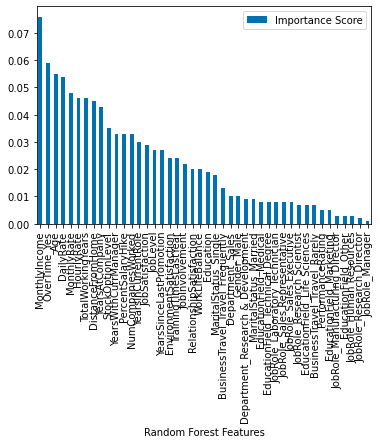

In [64]:
# Bar Chart Feature Importance Random Forest 
plt.figure(figsize = (20,15))
importance.plot.bar()

DECISION TREE CLASSIFIER MODEL

In [64]:
# Fitting the Decision Tree Classifier Model
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)  
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
print("The accuracy for the training data set is",acc_decision_tree, "Percent")

The accuracy for the training data set is 100.0 Percent


DECISION TREE CLASSIFIER MODEL OPTIMIZATION

In [65]:
## Selecting the optimal parameters of the Decision Tree Classifier Model and fitting the model
parameters = {'max_depth':range(1,50)}
decision_tree_1 = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=3)
decision_tree_1.fit(X_train, y_train)
acc_decision_tree_1 = round(decision_tree_1.score(X_train, y_train) * 100, 2)
tree_model = decision_tree_1.best_estimator_
print("The accuracy for the training data set is",acc_decision_tree_1)

The accuracy for the training data set is 85.8


In [66]:
# Prediction on the test data for decision tree classifier model
decision_tree_pred = decision_tree_1.predict(X_test)
decision_tree_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [67]:
# Confusion matrix on decision tree classifier model
confusion_matrix(y_test, decision_tree_1.predict(X_test))

array([[250,   5],
       [ 38,   1]])

In [68]:
# Classification report for Decision Tree Classifier on test data
print(classification_report(y_test, decision_tree_1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       255
           1       0.17      0.03      0.04        39

    accuracy                           0.85       294
   macro avg       0.52      0.50      0.48       294
weighted avg       0.78      0.85      0.80       294



In [69]:
# Bar Chart Feature Importance Decision Tree 
importances = pd.DataFrame({'Decision Tree Features':X_train.columns,'Importances Score':np.round(decision_tree.feature_importances_,3)})
importances = importances.sort_values('Importances Score',ascending=False).set_index('Decision Tree Features')

In [70]:
## Selecting the top 15 features that influence employee attrition
importances[:15]

,Importances Score
Decision Tree Features,
MonthlyIncome,0.126
OverTime_Yes,0.079
DailyRate,0.066
HourlyRate,0.062
Age,0.059
MonthlyRate,0.050
YearsSinceLastPromotion,0.043
YearsInCurrentRole,0.042
NumCompaniesWorked,0.040


<AxesSubplot:xlabel='Decision Tree Features'>

<Figure size 1440x1080 with 0 Axes>

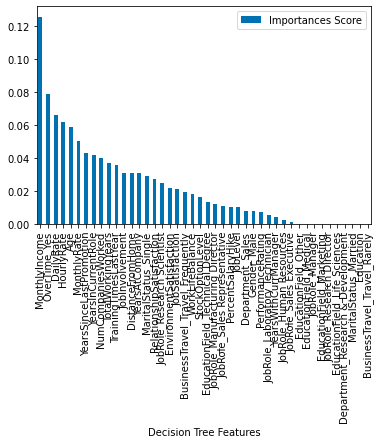

In [71]:
# Bar Chart Feature Importance Decison Tree 
plt.figure(figsize = (20,15))
importances.plot.bar()

<b> Findings<b>

    
It is seen that employee compensation, promotion, age are major drivers for employee attrition and must be given due consideration.
Also, the model with the best performance to predict employee attrition is the support vector machines classifier with an accuracy score of 90 percent. The models could be improved but we will recommend it for further studies.